In [1]:
base_path = "/content/drive/My Drive/Github/mtc-device-activation"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')# Load saved data

Mounted at /content/drive


In [6]:
!apt-get update
!apt-get install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,086 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4,780 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 P

Exception ignored in: <function NpzFile.__del__ at 0x7c4c54f62d40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/numpy/lib/_npyio_impl.py", line 226, in __del__
  File "/usr/local/lib/python3.11/dist-packages/numpy/lib/_npyio_impl.py", line 221, in close
OSError: [Errno 107] Transport endpoint is not connected


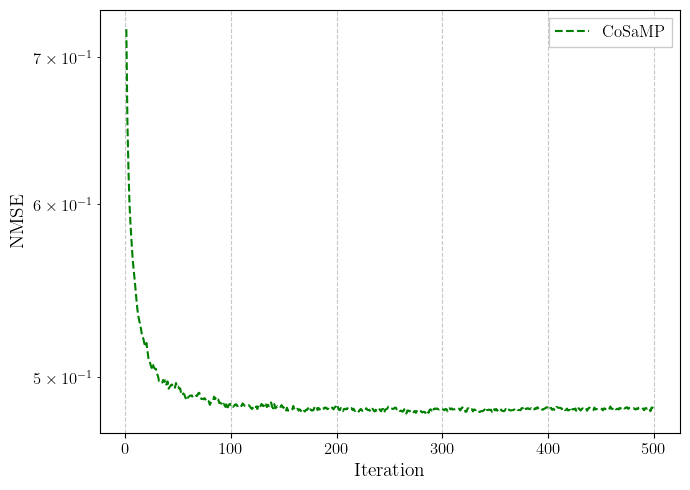

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# === Define paths to convergence data ===
file_paths_convergence = {
    #r'CA-SBL-ANC (Correlated Traffic)': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-convergence-casbl-anc-alpha-1-00-beta-0-10-snr-db-12-pilot-length-30.npz",
    #r'CA-SBL-ANC (Uncorrelated Traffic)': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-convergence-casbl-anc-uc-alpha-1-00-beta-0-10-snr-db-12-pilot-length-30.npz",
    #r'SBL': "/content/drive/My Drive/Github/mtc-device-activation/data/results/e2-results-1000-convergence-sbl-snr-db-12-pilot-length-30.npz",
    r'CoSaMP': f'{base_path}/convergence/data/cosamp_snr_db_12_pilot_length_30_convergence.npz',
}

# === Plot styles for each method ===
plot_styles = {
    #r'CA-SBL-ANC (Correlated Traffic)': {'color': 'b', 'marker': '', 'linestyle': '-'},
    #r'CA-SBL-ANC (Uncorrelated Traffic)': {'color': 'm', 'marker': '', 'linestyle': '-'},
    #r'SBL': {'color': 'r', 'marker': '', 'linestyle': '--'},
    r'CoSaMP': {'color': 'g', 'marker': '', 'linestyle': '--'},
}

# === Load convergence datasets ===
convergence_datasets = {}
for label, path in file_paths_convergence.items():
    data = np.load(path, allow_pickle=True)
    convergence_datasets[label] = data['nmse_iter_all']  # shape: [samples, iterations]

# === Set global plot params ===
plt.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
})

# === Plot NMSE vs Iteration ===
plt.figure(figsize=(7, 5))
for label, nmse_matrix in convergence_datasets.items():
    style = plot_styles[label]

    avg_nmse = np.mean(nmse_matrix, axis=0)

    plt.plot(
        np.arange(1, len(avg_nmse) + 1),
        avg_nmse,
        marker=style['marker'],
        linestyle=style['linestyle'],
        color=style['color'],
        label=label
    )

plt.xlabel('Iteration')
plt.ylabel('NMSE')
plt.yscale('log')
plt.grid(True)
plt.legend(frameon=True, framealpha=1, facecolor='white', fancybox=False)
plt.tight_layout()
plt.savefig(f'{base_path}/convergence/figures/nmse_convergence.eps', format='eps', bbox_inches='tight', dpi=300)
plt.show()
